In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mush_df = pd.read_csv('C:\\Users\\UserOfPC\\Documents\\Основы Data Science Stepik\\Датасеты\\training_mush.csv')

In [4]:
mush_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

RandomForestClassifier(
)

Параметры для выбора -

n_estimators: от 10 до 50 с шагом 10
max_depth: от 1 до 12 с шагом 2
min_samples_leaf: от 1 до 7
min_samples_split: от 2 до 9 с шагом 2
Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [5]:
X = mush_df.drop('class', axis=1)

In [6]:
y = mush_df['class']

In [7]:
clf_rf = RandomForestClassifier(random_state=0)

In [8]:
parametrs = {'n_estimators': range(10, 51, 10),
              'max_depth': range(1, 13, 2),
              'min_samples_leaf': range(1, 8),
              'min_samples_split': range(2, 10, 2),
             }

In [9]:
grid_search_cv_clf_rf = GridSearchCV(clf_rf, parametrs, cv=3)

In [10]:
grid_search_cv_clf_rf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [11]:
grid_search_cv_clf_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

Посмотрим на важность фичей

In [12]:
best_estimator_rf = grid_search_cv_clf_rf.best_estimator_

In [13]:
feature_importances = best_estimator_rf.feature_importances_

In [14]:
feature_importances_df = pd.DataFrame({'features': list(X),
                          'feature_importances': feature_importances})

In [15]:
feature_importances_df = feature_importances_df.sort_values('feature_importances', ascending = False)

<Axes: xlabel='feature_importances', ylabel='features'>

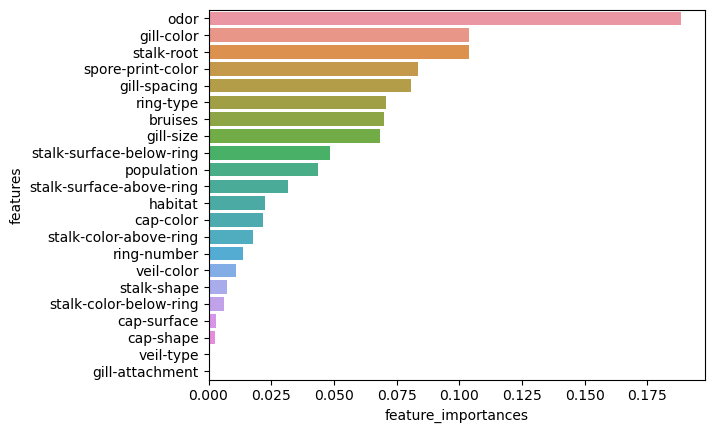

In [16]:
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)

Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

 

Заметьте, что для использования этого леса на новых грибах, нам нужно будет заполнить значения параметров гриба, часть из которых определить проще (например, цвет шляпки), а для определения части понадобится специалист-миколог.
То есть в этом случае нам придётся самим экстрагировать признаки из объекта. Для зрительных признаков типа формы, цвета можно использовать более сложную модель (например, свёрточную нейронную сеть) и подавать на вход фотки гриба. И модель сама извлечёт признаки вместо того, чтобы нам описывать самим. Но одной фоткой тут не отделаешься - для определения запаха понадобится ещё детектор

In [17]:
test_mush_df = pd.read_csv('C:\\Users\\UserOfPC\\Documents\\Основы Data Science Stepik\\Датасеты\\testing_mush.csv')

In [18]:
test_mush_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [19]:
y_pred = best_estimator_rf.predict(test_mush_df)

In [20]:
y_pred = pd.DataFrame(y_pred)

In [21]:
y_pred.where(y_pred > 0).count()

0    976
dtype: int64

Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам, (воспользуйтесь паролем из предыдущего задания, чтобы открыть их). Выберите из предложенных вариантов правильный

Открываем запароленный zip файл по ссылке:

In [22]:
import requests, zipfile, io 

url = "https://stepik.org/media/attachments/course/4852/testing_y_mush.csv.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
password = 'Cool!Move_forward!'
txtfiles = z.namelist()
right_mush = pd.read_csv(z.open(txtfiles[0], "r", pwd=password.encode('cp850', 'replace')))

In [23]:
right_mush.head()

,class
0,0
1,0
2,1
3,1
4,1


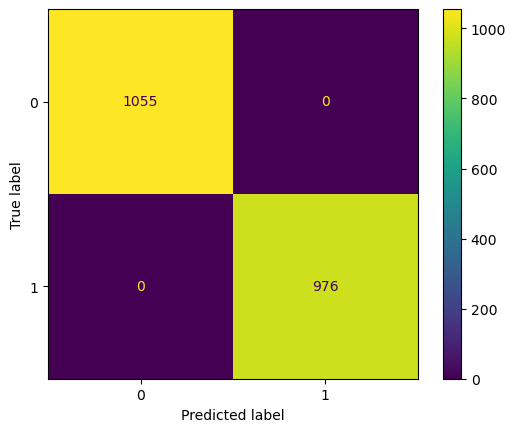

In [24]:
cm = confusion_matrix(right_mush, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()